# Edge and Line Detection

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Reading Image 

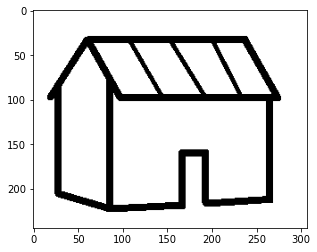

In [3]:
img = cv2.imread("home.png", cv2.IMREAD_GRAYSCALE)
img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
plt.imshow(img, cmap = 'gray')

In [12]:
img.shape

(244, 307)

## Using inbuilt function 

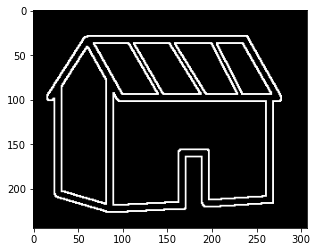

In [22]:
kernal = np.ones((3, 3))
img_bound = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernal) 
plt.imshow(img_bound, cmap = 'gray')

## Using sobel filter for vertical edge and horizontal detection 

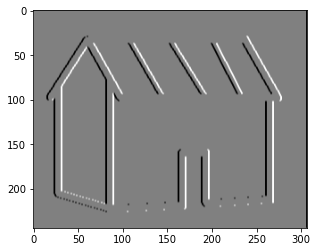

In [23]:
filter = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
filtered_img = cv2.filter2D(img, -1, cv2.flip(filter, -1), borderType=cv2.BORDER_CONSTANT)
plt.imshow(filtered_img, cmap = 'gray')

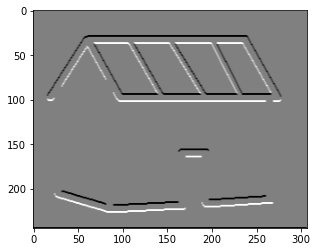

In [24]:
filter = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
filtered_img = cv2.filter2D(img, -1, cv2.flip(filter, -1), borderType=cv2.BORDER_CONSTANT)
plt.imshow(filtered_img, cmap = 'gray')

## Using prewitt filter for vertical edge and horizontal detection

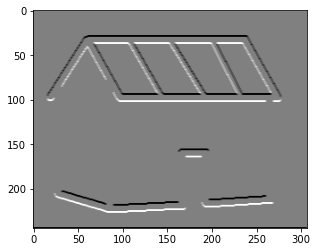

In [25]:
filter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
filtered_img = cv2.filter2D(img, -1, cv2.flip(filter, -1), borderType=cv2.BORDER_CONSTANT)
plt.imshow(filtered_img, cmap = 'gray')

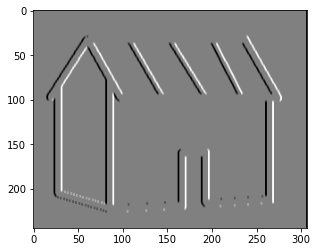

In [26]:
filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
filtered_img = cv2.filter2D(img, -1, cv2.flip(filter, -1), borderType=cv2.BORDER_CONSTANT)
plt.imshow(filtered_img, cmap = 'gray')

<Figure size 432x288 with 0 Axes>

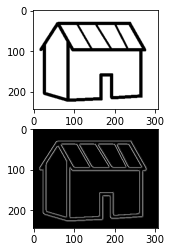

In [5]:
def Canny_detector(img, weak_th = None, strong_th = None): 
       
    img = cv2.GaussianBlur(img, (5, 5), 1.4) 
       
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 
      
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 
       
    mag_max = np.max(mag) 
    if not weak_th:
        weak_th = mag_max * 0.1
    if not strong_th:
        strong_th = mag_max * 0.5
      
    height, width = img.shape 
       
    for i_x in range(width): 
        for i_y in range(height): 
               
            grad_ang = ang[i_y, i_x] 
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
               
            if grad_ang<= 22.5: 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 
              
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 
               
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img) 
    strong_ids = np.zeros_like(img)               
    ids = np.zeros_like(img) 
       
    for i_x in range(width): 
        for i_y in range(height): 
              
            grad_mag = mag[i_y, i_x] 
              
            if grad_mag<weak_th: 
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th: 
                ids[i_y, i_x]= 1
            else: 
                ids[i_y, i_x]= 2
       
    return mag 
   
canny_img = Canny_detector(img) 
   
# Displaying the input and output image   
plt.figure() 
f, plots = plt.subplots(2, 1)  
plots[0].imshow(img, cmap = 'gray') 
plots[1].imshow(canny_img, cmap = 'gray') 